In [1]:
import pandas as pd 
df=pd.read_csv("C:/Users/PC/Downloads/Microsoft_malware_dataset_min.csv")
df.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [2]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


(100000, 10)

In [3]:
df.isnull().sum()

HasDetections                    0
Wdft_IsGamer                  3415
Census_IsVirtualDevice         185
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                      1076
SMode                         5932
IsProtected                    391
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64

In [4]:
df['Wdft_IsGamer'].fillna(df['Wdft_IsGamer'].mode()[0], inplace=True)

In [5]:
df['Census_IsVirtualDevice'].fillna(df['Census_IsVirtualDevice'].mode()[0], inplace=True)

In [6]:
df['Firewall'].fillna(df['Firewall'].mode()[0], inplace=True)

In [7]:
df['SMode'].fillna(df['SMode'].mode()[0], inplace=True)

In [8]:
df['IsProtected'].fillna(df['IsProtected'].mode()[0], inplace=True)

In [9]:
df.duplicated().sum()

83886

In [10]:
df_numerique = df.select_dtypes(include=['number'])
df_non_numerique = df.select_dtypes(exclude=['number'])


from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in df_non_numerique:
    df[column]=le.fit_transform(df[column])

In [11]:
df.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,11,0,1.0,0.0,1.0,4,29
1,0,0.0,0.0,11,0,1.0,0.0,1.0,4,93
2,0,0.0,0.0,1,0,1.0,0.0,1.0,4,86
3,1,0.0,0.0,11,0,1.0,0.0,1.0,4,88
4,1,0.0,0.0,1,0,1.0,0.0,1.0,4,18


In [12]:
from sklearn.model_selection import train_test_split
y = df['HasDetections'].values
features = df.drop(['HasDetections'], axis=1)
x = features.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree   
from sklearn.metrics import accuracy_score
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.5328787878787878


In [15]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

clf_gini.fit(x_train, y_train)
y_pred_gini = clf_gini.predict(x_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.5405


In [16]:
new_df = df.drop(['HasDetections'] , axis = 1 )
new_df.head()

,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0.0,0.0,11,0,1.0,0.0,1.0,4,29
1,0.0,0.0,11,0,1.0,0.0,1.0,4,93
2,0.0,0.0,1,0,1.0,0.0,1.0,4,86
3,0.0,0.0,11,0,1.0,0.0,1.0,4,88
4,0.0,0.0,1,0,1.0,0.0,1.0,4,18


In [28]:
new_df['CountryIdentifier'].value_counts

<bound method IndexOpsMixin.value_counts of 0         29
1         93
2         86
3         88
4         18
        ... 
99995    177
99996    206
99997     93
99998     29
99999     50
Name: CountryIdentifier, Length: 100000, dtype: int64>

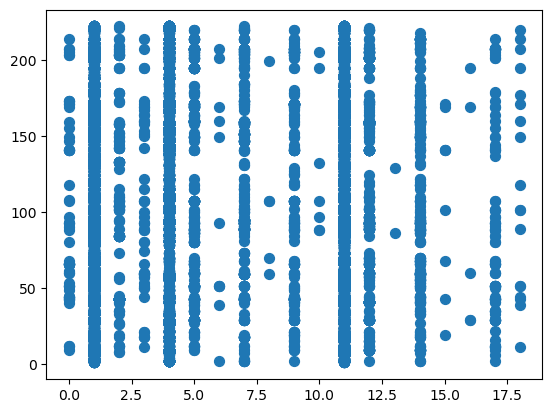

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.scatter(new_df['Census_OSEdition'], new_df['CountryIdentifier'], s=50)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


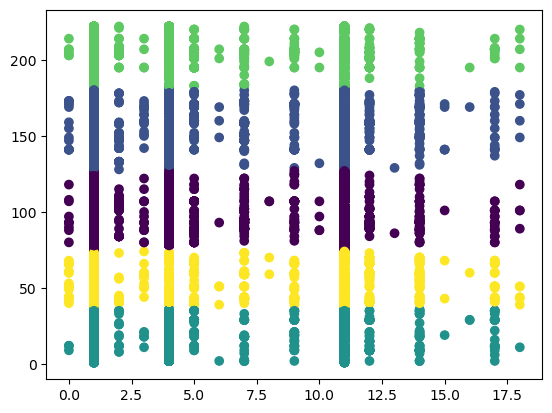

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(new_df)

plt.scatter(new_df['Census_OSEdition'], new_df['CountryIdentifier'], c=kmeans.labels_)
plt.show()



C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

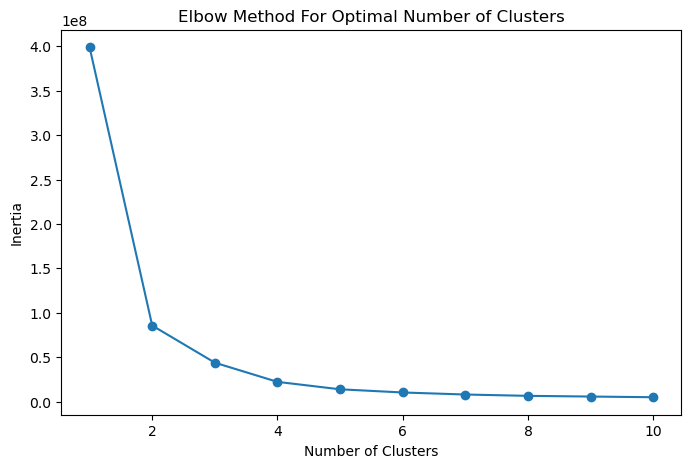

In [23]:
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(new_df)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


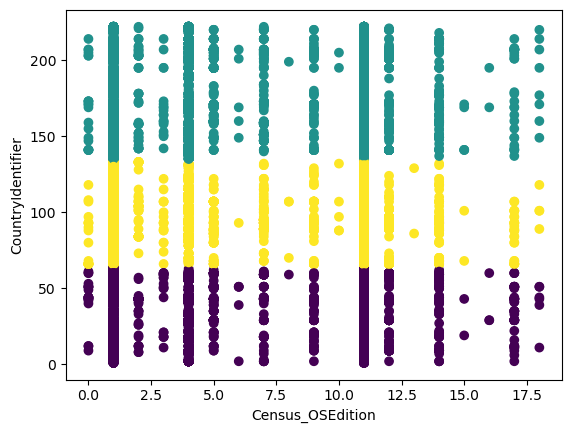

In [26]:
n_clusters = 3
kmeans = KMeans(n_clusters)
kmeans.fit(new_df)

plt.scatter(new_df['Census_OSEdition'], new_df['CountryIdentifier'], c=kmeans.labels_)
plt.xlabel('Census_OSEdition')
plt.ylabel('CountryIdentifier')
plt.show()